In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Importamos dataset de diabetes
Dataset obtenido de https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
pwd

In [3]:
diabetes = pd.read_csv('clusterai_2020_clase03_dataset_diabetes.csv', delimiter=',')

In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocesamiento

1) Revisar si hay NaNs. Decidir si eliminar o no las filas que tengan NaNs.

In [6]:
diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

2) Realizar un "pairplot" con seaborn con todas las features.

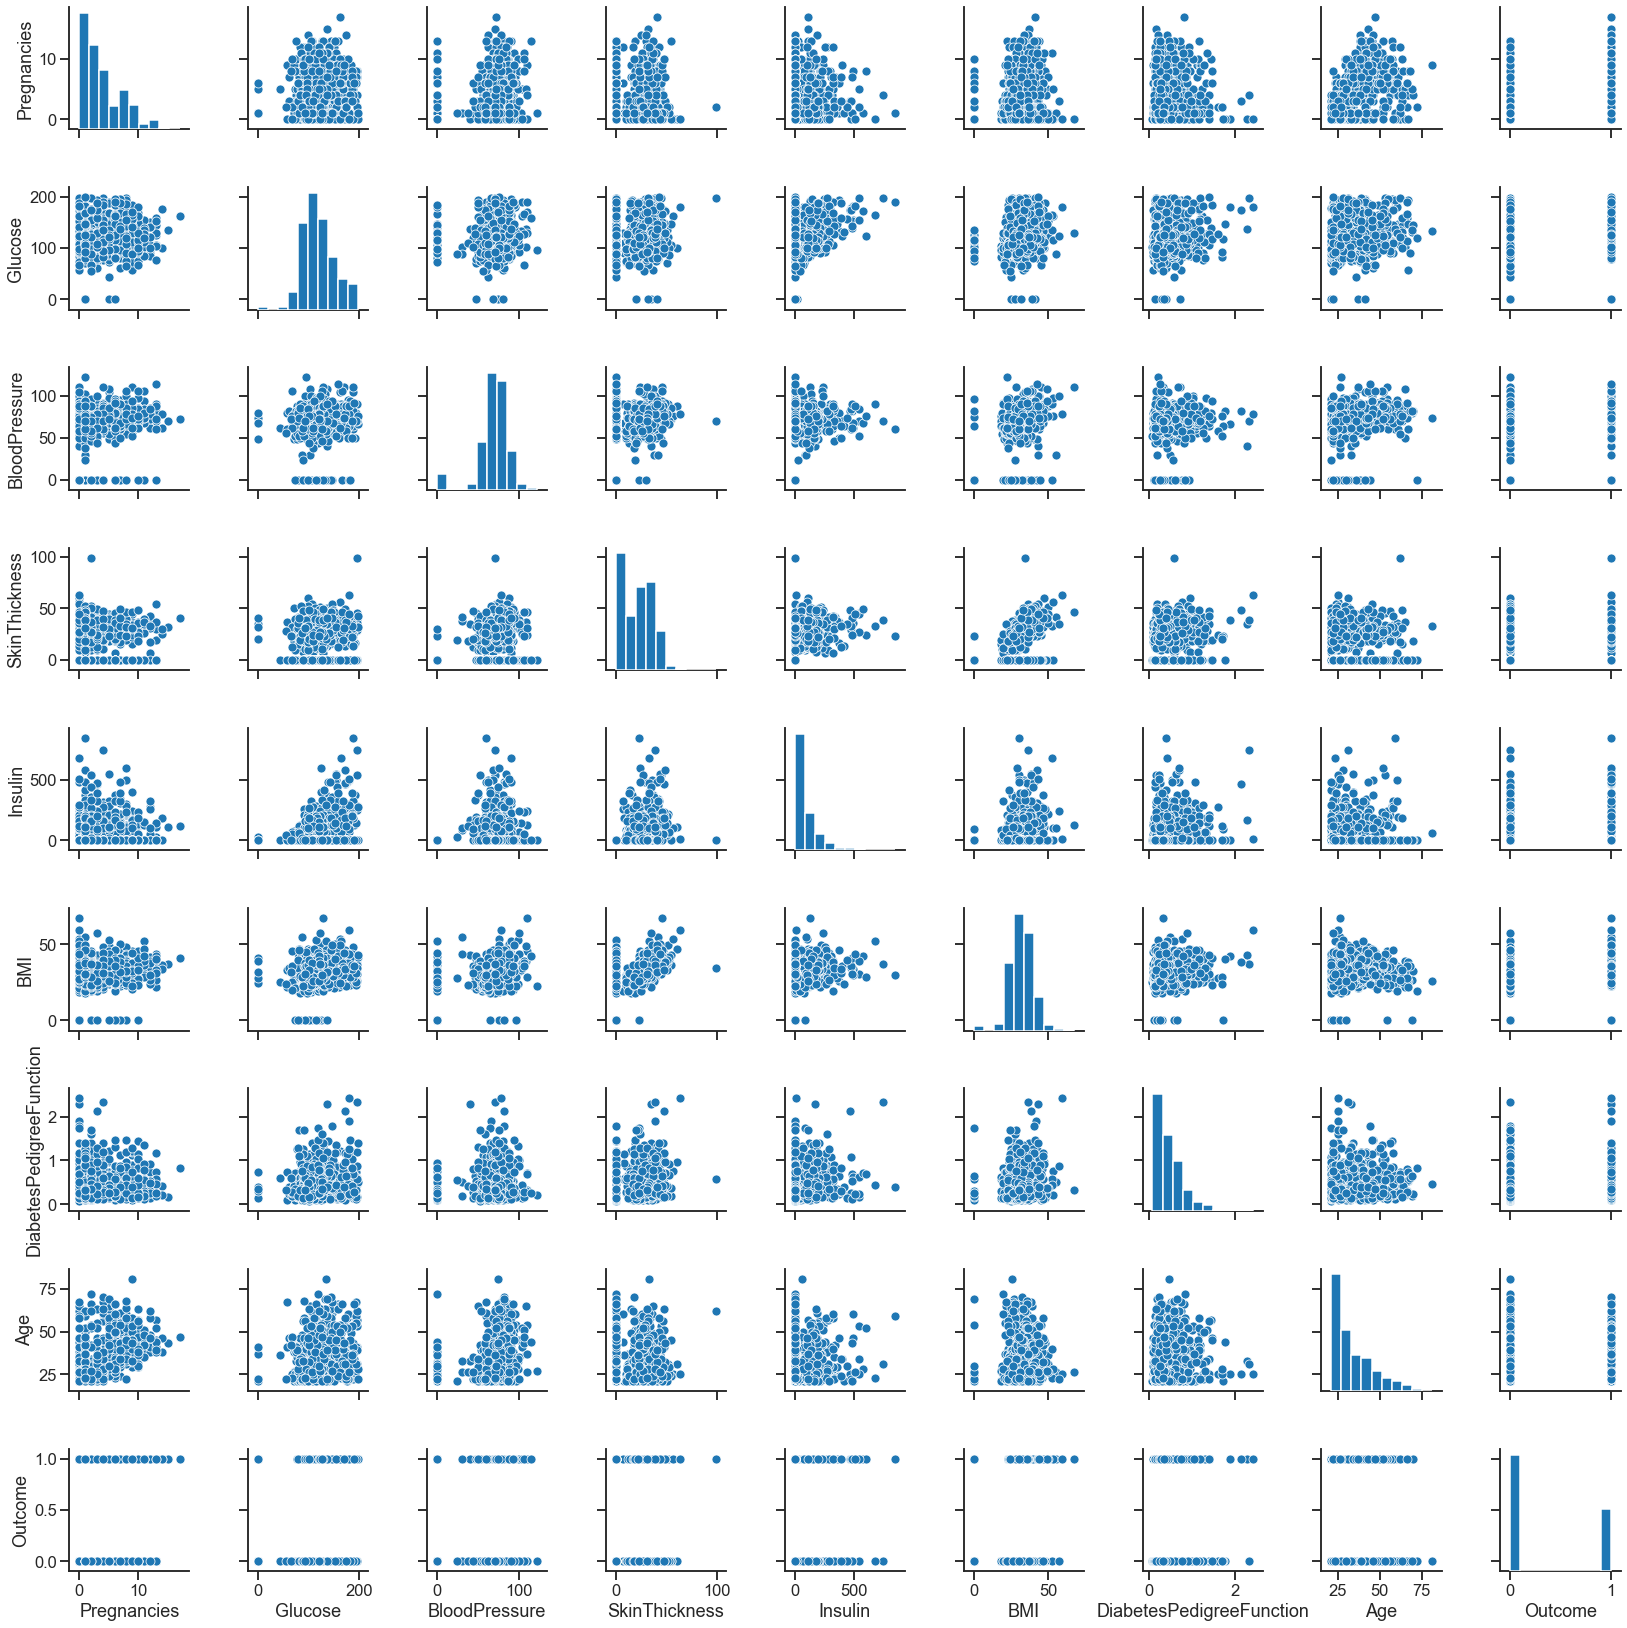

In [7]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")

sns.pairplot(diabetes)
plt.show()

# Preparar el dataset para Machine Learning

3) Separar los datos con los que vamos a trabajar con Clasificacion. Definir cual sera la matrix X de samples y features y cual sera la variable dependiente/objetivo Y.

In [8]:
from sklearn import preprocessing
x = diabetes.iloc[:,:8]
y = diabetes.iloc[:,8]
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

4) Dividir nuestros datos en Train y Test con "train_test_split" de Scikit Learn

In [9]:
### Codigo para dividir nuestros datos en Train y Test ####
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)


5) Realizar autoscaling con el train set. Una vez autoescalados los datos, ajustar los datos del test con el autoscaling realizado.

In [10]:
### Codigo para autoscaling ####
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

# Entrenar un modelo clasificador

6) Crear y entrenar un modelo clasificador de Logistic Regression. 

In [11]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[1, 10, 100, 1000]}
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
clf_lr = GridSearchCV(lr_model, param_grid = parameters, refit = True, cv = 5)
clf_lr.fit(xtrain_scal, ytrain.ravel())
print("The best parameters are %s with a score of %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))

The best parameters are {'C': 1} with a score of 0.75


7) Testear el modelo entrenado con los datos de test.

In [12]:
ypred_lr = clf_lr.predict(xtest_scal)

8) Evaluar la performance del modelo con Accuracy, AUC ROC, Matriz de confusion.

El accuracy es 0.8138528138528138
El AUC es = 0.8555129913391073


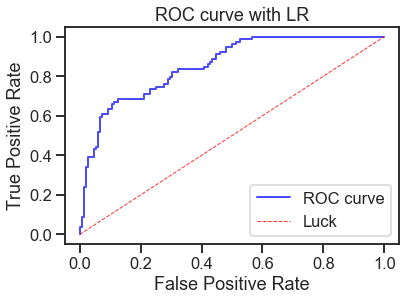

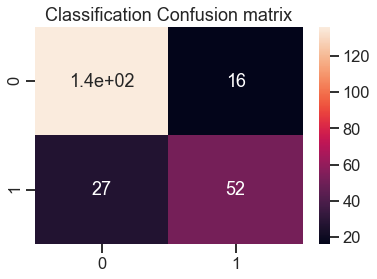

In [13]:
test_acc_lr = accuracy_score(ytest, ypred_lr)
print("El accuracy es " + str(test_acc_lr))

pred_lr_proba = clf_lr.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), pred_lr_proba[:,1], drop_intermediate = False)
auc1 = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc1))

plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LR')
plt.show()

cm1 = confusion_matrix(ytest, ypred_lr)
df_cm = pd.DataFrame(cm1, index = ['0', '1'], columns = ["0", '1'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

9) Repetir el proceso de entrenamiento con el modelo KNN

El accuracy es 0.7705627705627706
El AUC es = 0.802340106595603


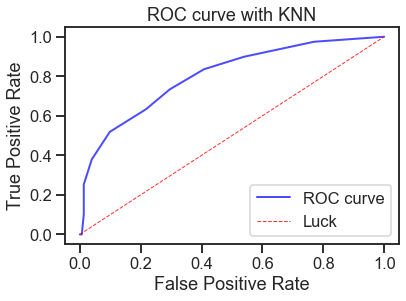

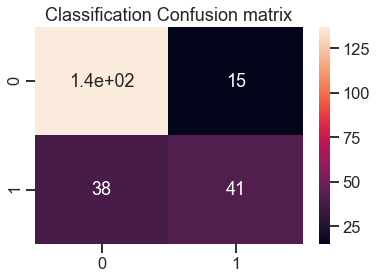

In [15]:
### Codigo para entrenar modelo KNN ####
parameters = {'n_neighbors':[1,5, 10,20, 50], }
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid = parameters, refit = True, cv = 5)
clf_knn.fit(xtrain_scal, ytrain.ravel())
ypred_knn = clf_knn.predict(xtest_scal)

test_acc2 = accuracy_score(ytest, ypred_knn)
print("El accuracy es " + str(test_acc2))

pred_knn_proba = clf_knn.predict_proba(xtest_scal)
fpr2, tpr2, thresholds = roc_curve(ytest.astype('int'), pred_knn_proba[:,1], drop_intermediate = False)
auc2 = metrics.auc(fpr2, tpr2)
print("El AUC es = " + str(auc2))

plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

cm2 = confusion_matrix(ytest, ypred_knn)
df_cm = pd.DataFrame(cm2, index = ['0', '1'], columns = ["0", '1'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

10) Repetir el proceso de entrenamiento con el modelo SVM

In [16]:
### Codigo para entrenar modelo SVM ####

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC(probability=True)
clf_svm = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clf_svm.fit(xtrain_scal, ytrain.ravel())
print("The best parameters are %s with a score of %0.2f" % (clf_svm.best_params_, clf_svm.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.76


In [17]:
ypred_svm = clf_svm.predict(xtest_scal)

El accuracy es 0.7792207792207793
El AUC es = 0.8458527648234511


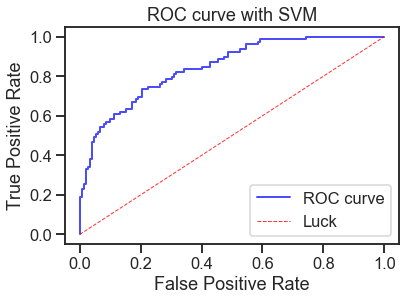

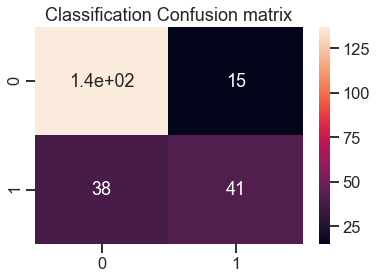

In [18]:
test_acc3 = accuracy_score(ytest, ypred_svm)
print("El accuracy es " + str(test_acc3))

pred_svm_proba = clf_svm.predict_proba(xtest_scal)
fpr3, tpr3, thresholds = roc_curve(ytest.astype('int'), pred_svm_proba[:,1], drop_intermediate = False)
auc3 = metrics.auc(fpr3, tpr3)
print("El AUC es = " + str(auc3))

plt.plot(fpr3, tpr3, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM')
plt.show()

cm3 = confusion_matrix(ytest, ypred_knn)
df_cm = pd.DataFrame(cm3, index = ['0', '1'], columns = ["0", '1'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()